<a href="https://colab.research.google.com/github/sushanC/Heart-Disease-Predictor/blob/main/HeartDiseasePredictionUsingAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sushanachar","key":"5011dc9fd5c14aa114fcb5dd2bb7d6e9"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [4]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease-data --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 42.3MB/s]


In [5]:
import pandas as pd
df = pd.read_csv('/content/heart-disease-data/heart_disease_uci.csv')

In [6]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [7]:
df.tail()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


In [8]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [9]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [10]:
numaric_col=df.select_dtypes(include='number').columns
df[numaric_col]=df[numaric_col].fillna(df[numaric_col].mean())

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

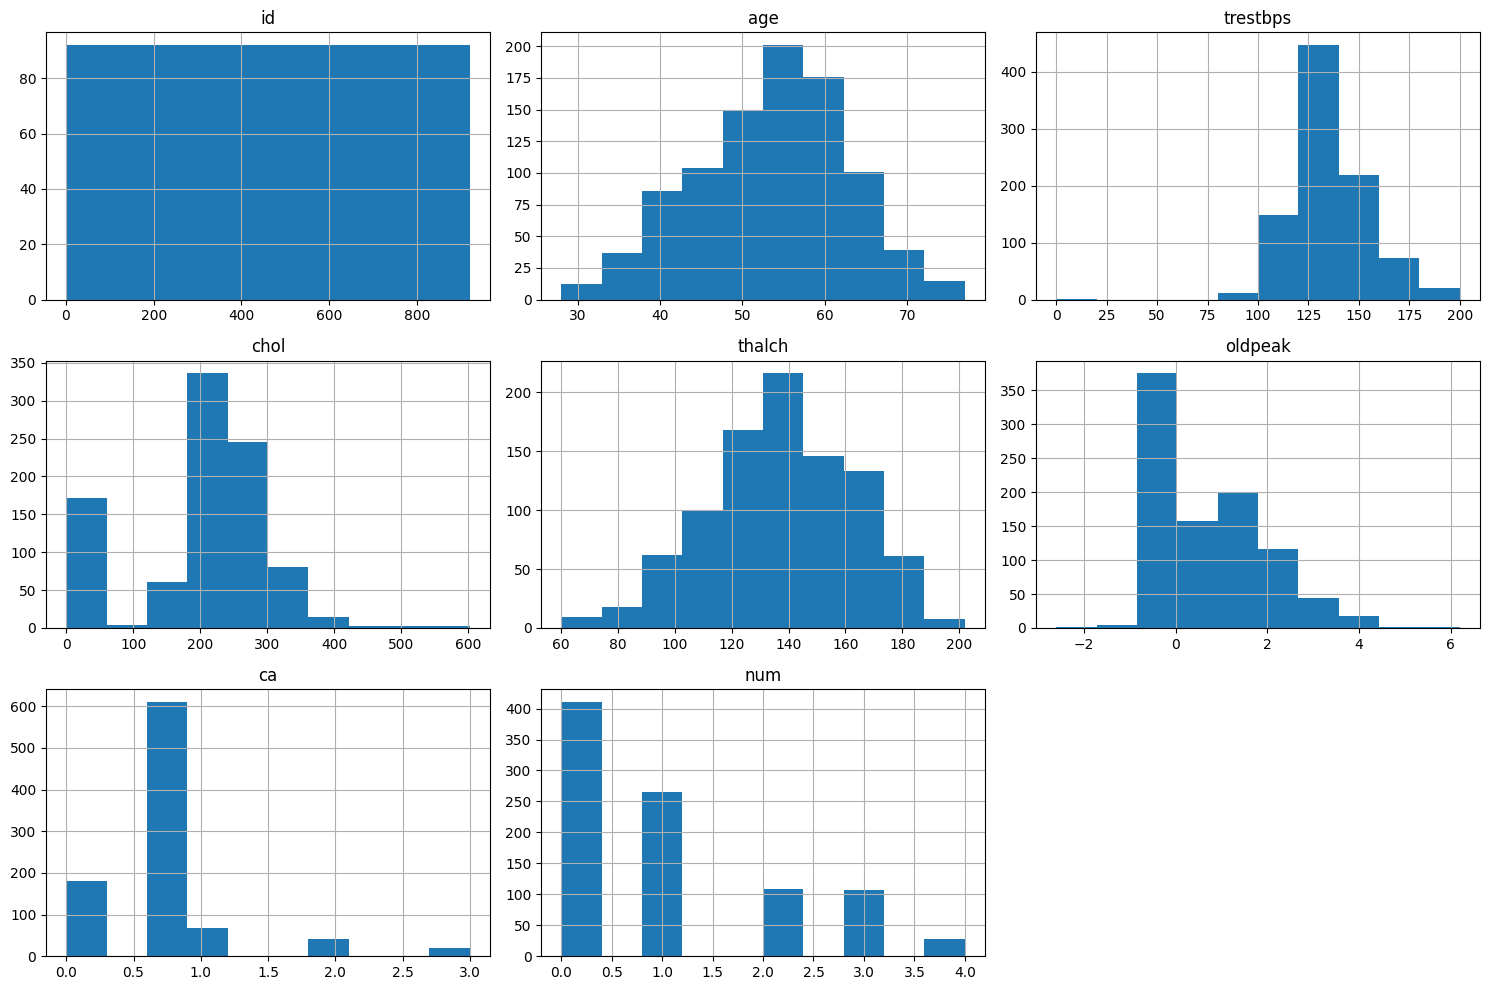

In [12]:
df[numaric_col].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

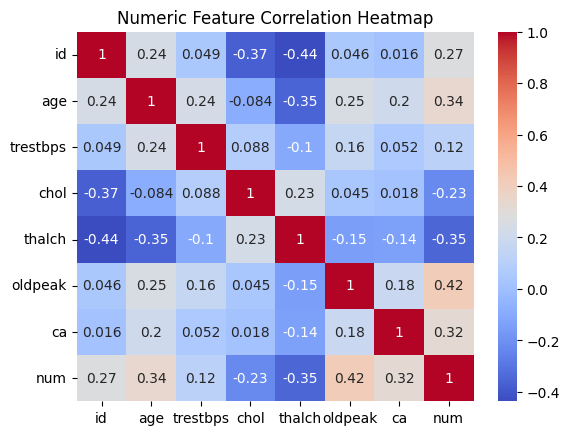

In [13]:
sns.heatmap(df[numaric_col].corr(),annot=True , cmap='coolwarm')
plt.title('Numeric Feature Correlation Heatmap')
plt.show()

In [14]:
cat_cols=df.select_dtypes(include='object').columns.tolist()# one-hot Encode all object Categerical columns
if 'num' in cat_cols:
    cat_cols.remove('num')

In [15]:
x=df.drop('num',axis=1)
y=(df['num']>0).astype(int) # 0: No disease ,1:Disease Present

In [16]:
x = pd.get_dummies(x, columns=cat_cols)
print("Final Feature Columns: ", x.columns)

Final Feature Columns:  Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr_model=LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [22]:
from sklearn.metrics import accuracy_score,classification_report

In [23]:
y_pred_lr = lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test,y_pred_lr))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [24]:
from sklearn.metrics import confusion_matrix

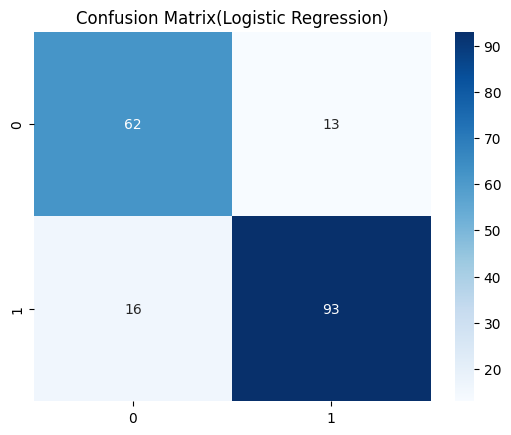

In [25]:
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix(Logistic Regression)')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.8858695652173914


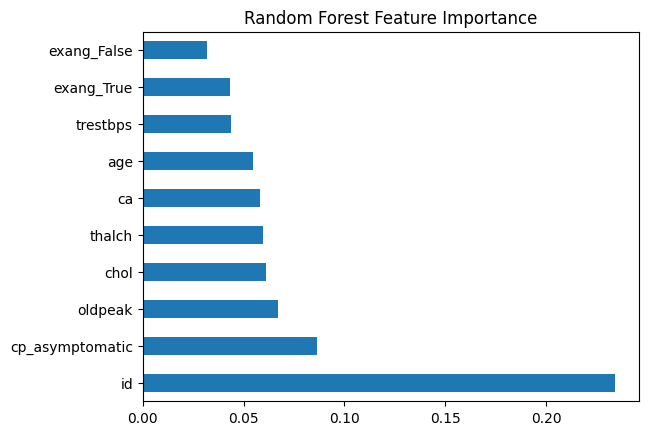

In [28]:
feat_imp = pd.Series(rf_model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feature Importance')
plt.show()

In [29]:
import joblib
joblib.dump(rf_model, 'heart_rf_model.pkl')
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [30]:
joblib.dump(scaler,'heart_scaler.pkl')

['heart_scaler.pkl']

In [31]:
sample = x.head(1)
sample.to_csv("heart_user_template.csv",index=False)
print("User Templates saved as 'Heart_user_templates.csv'")

User Templates saved as 'Heart_user_templates.csv'


In [32]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset.csv


{'heart_dataset.csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

In [34]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')

# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]

# Fill missing values in numeric columns with training set mean
user_df[numeric_cols] = user_df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)

# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=x.columns, fill_value=0)

# Scale data
scaler = joblib.load('heart_scaler.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('heart_rf_model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           